# Πλάγια βολή με αντίσταση αέρα

Ζητάμε να βρούμε την κίνηση ενός σώματος που βάλλεται με γωνία $\theta$ ώς προς τον ορίζοντα, όταν δέχεται εκτός από το βάρος του και τη δύναμη της αντίστασης του αέρα $\vec F' = -b\vec v$.

Επομένως στον $x$ άξονα θα ισχύει $$m a_x = -bv_x$$ ενώ στον $y$ άξονα $$ma_y = -bv_y - mg$$

Αυτές είναι δύο διαφορικές εξισώσεις που γράφονται ως:
$$\dfrac{d^2x}{dt^2} = -\dfrac{b}{m}\dfrac{dx}{dt}$$
$$\dfrac{d^2y}{dt^2} = -\dfrac{b}{m}\dfrac{dy}{dt} - g$$

Για την λύση τους θα χρησιμοποιήσουμε την συνάρτηση odeint από το πακέτο scipy της python, και θα λύσουμε έτσι αριθμητικά τις διαφορικές μας.

In [6]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from IPython.display import Latex
%matplotlib inline

In [7]:
#constants and initial conditions
m = 2               # kg
g = 9.81            # m/s^2
v0 = 30             # m/s
theta = math.pi/3   # rad

# initial conditions
vy0 = v0*math.sin(theta)
vx0 = v0*math.cos(theta)
y0 = 0
x0 = 0

In [8]:
# function that returns dx/dt and d^2x/dt^2
def dx(x, t, b) :
    # x[0]=x
    # x[1]=v_x=dx/dt
    return [x[1], (-b/m)*x[1]]

# function that returns dy/dt and d^2y/dt^2
def dy(y, t, b) :
    # y[0]=y and y[1]=dy/dt=v_y
    return [y[1], (-b/m)*y[1] - g]

Οι αρχικές συνθήκες είναι $x=0$, αρχική ταχύτητα $v_0=60$m/s και οι συνιστώσες της $v_x=v_0\cos\theta$ ενώ για τον $y$ άξονα $y=0$  και $v_y=v_0\sin\theta$ 

In [12]:
# time points
dy0 = [y0, vy0]
dx0 = [x0, vx0]
print('Εδώ :')
display(Latex('$y = $ {0}, $v_{{y0}} = $ {1:.1f}'.format(dy0[0], dy0[1])))
display(Latex('$x = $ {0}, $v_{{x0}} = $ {1:.1f}'.format(dx0[0], dx0[1])))


Εδώ :


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [20]:
# solve ODEs for varius constants b
t = np.linspace(0,7)
#near perfect trajectory
b = 0.0001
ys1 = odeint(dy, dy0, t, args=(b,))
xs1 = odeint(dx, dx0, t, args=(b,))
x1 = xs1[:,0]
vx1 = xs1[:,1]
y1 = ys1[:,0]
vy1 = ys1[:,1]
b2 = 0.1
ys2 = odeint(dy, dy0, t, args=(b2,))
xs2 = odeint(dx, dx0, t, args=(b2,))
x2 = xs2[:,0]
vx2 = xs2[:,1]
y2 = ys2[:,0]
vy1 = ys1[:,1]
b3 = 1.5
ys3 = odeint(dy, dy0, t, args=(b3,))
xs3 = odeint(dx, dx0, t, args=(b3,))
x3 = xs3[:,0]
vx3 = xs3[:,1]
y3 = ys3[:,0]
vy3 = ys3[:,1]
b4 = 0.8
ys4 = odeint(dy, dy0, t, args=(b4,))
xs4 = odeint(dx, dx0, t, args=(b4,))
x4 = xs4[:,0]
vx4 = xs4[:,1]
y4 = ys4[:,0]
vy4 = ys4[:,1]

In [21]:
display(Latex('Initial velocity $V_0 =$ {0} m/s. Angle of Projection $\\theta =$ {1:.1f}'.format(v0, math.degrees(theta))))
display(Latex('$v_x =$ {:.1f} m/s'.format(vx0)))
display(Latex('$v_y =$ {:.1f} m/s'.format(vy0)))
Latex('$b =$ {0}'.format(b2))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

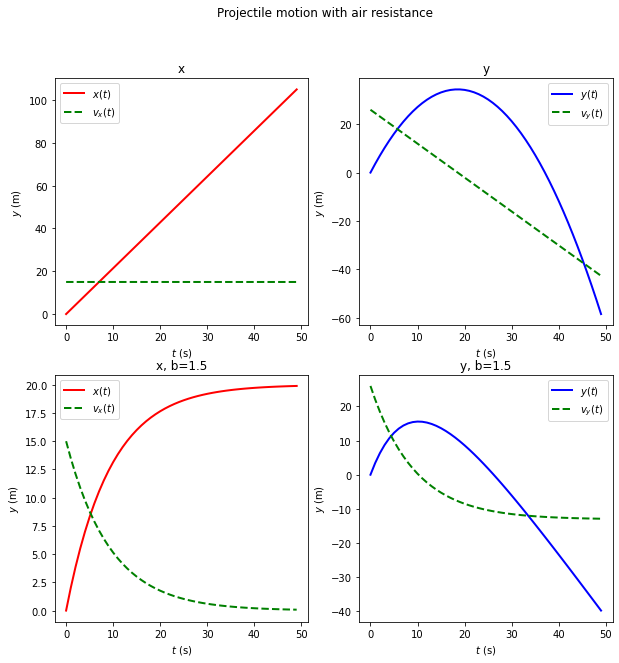

In [22]:
# plot results
plt.rcParams["figure.figsize"] = (10,10)
#plt.ylim(0,20)
# Creates two subplots and unpacks the output array immediately
f, ax = plt.subplots(2, 2) #, sharey=True
#f.title('Πλάγια βολή με αντίσταση αέρα $F=-bv$')
ax[0,0].plot(x1,'r',linewidth=2,label='$x(t)$')
ax[0,0].plot(vx1,'g--', linewidth=2,label='$v_x(t)$')
ax[0,0].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[0,0].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
ax[0,0].set_title('x')
ax[0,0].legend()
ax[0,1].plot(y1,'b',linewidth=2,label='$y(t)$')
ax[0,1].plot(vy1, 'g--', linewidth=2,label='$v_y(t)$')
ax[0,1].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[0,1].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
ax[0,1].set_title('y')
ax[0,1].legend()
ax[1,0].plot(x3,'r',linewidth=2,label='$x(t)$')
ax[1,0].plot(vx3,'g--', linewidth=2,label='$v_x(t)$')
ax[1,0].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[1,0].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
ax[1,0].set_title('x, b=1.5')
ax[1,0].legend()
ax[1,1].plot(y3,'b',linewidth=2,label='$y(t)$')
ax[1,1].plot(vy3, 'g--', linewidth=2,label='$v_y(t)$')
ax[1,1].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[1,1].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
ax[1,1].set_title('y, b=1.5')
ax[1,1].legend()
plt.suptitle("Projectile motion with air resistance")
#plt.savefig('projectile.png')
plt.show()

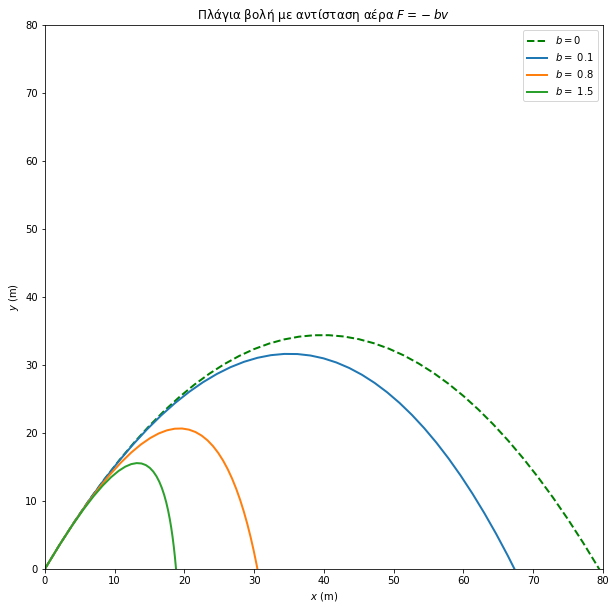

In [23]:
# plot results
plt.title('Πλάγια βολή με αντίσταση αέρα $F=-bv$')
plt.ylim(0,80)
plt.xlim(0,80)
plt.plot(x1,y1,'g--',linewidth=2,label='$b = 0$')
plt.plot(x2,y2,linewidth=2,label='$b = $ {0}'.format(b2))
plt.plot(x4,y4,linewidth=2,label='$b = $ {0}'.format(b4))
plt.plot(x3,y3,linewidth=2,label='$b = $ {0}'.format(b3))

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.legend()
#plt.savefig('projectile.png')
plt.show()
